<a href="https://colab.research.google.com/github/shubhM13/monzo_account_analytics/blob/main/colab_notebooks/2020_monthly_cohorts_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%pip install google-cloud-bigquery pandas seaborn matplotlib

### Imports

In [90]:
from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth

### Authentication

In [1]:
auth.authenticate_user()

In [91]:
# Set plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 8)

# Create a BigQuery client
client = bigquery.Client(project='analytics-take-home-test')

query = """
SELECT *
FROM `analytics-take-home-test.monzo_datawarehouse_shubh_cohorts.cohort_retention_monthly`
"""

# Execute the query and convert the results to a pandas DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Display the DataFrame
df.head()


,cohort,period,retained_users,signed_up_users,retention_percentage
0,2020-01-01,0,128,188,68.085106
1,2020-01-01,1,144,188,76.595745
2,2020-01-01,2,135,188,71.808511
3,2020-01-01,3,108,188,57.446809
4,2020-01-01,4,110,188,58.510638


### Chart 1: Number of Users per Cohort and Number of Active Users per Cohort

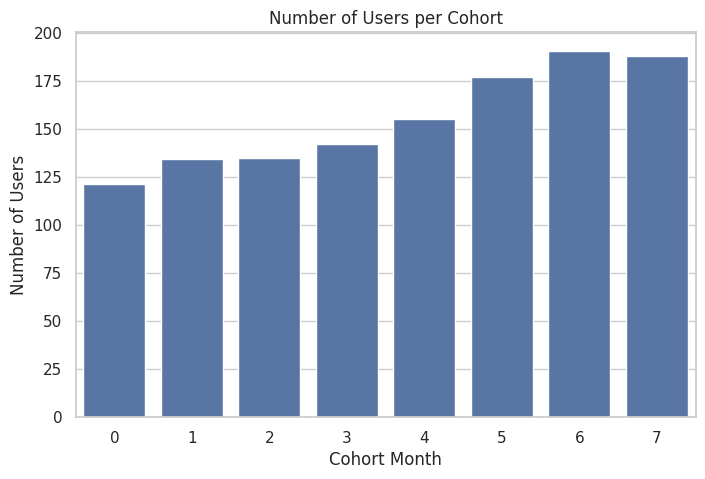

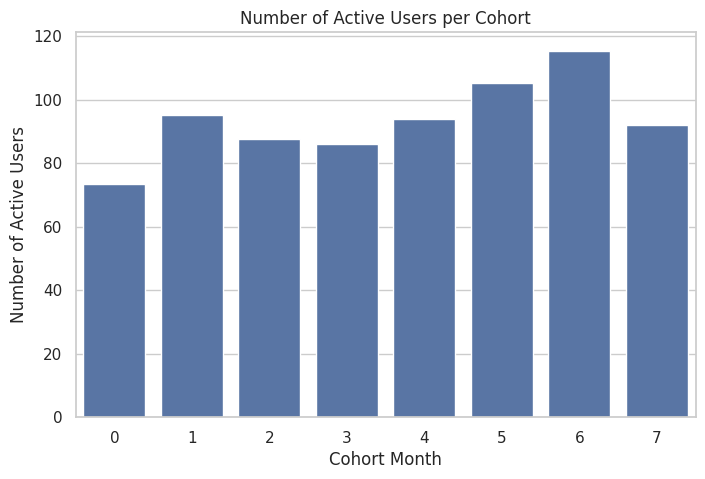

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

query = """
SELECT *
FROM `analytics-take-home-test.monzo_datawarehouse_shubh_cohorts.cohort_retention_monthly`
"""

# Execute the query and convert the results to a pandas DataFrame
query_job = client.query(query)
cohort_retention_monthly = query_job.to_dataframe()

# Create a bar plot for number of users per cohort
plt.figure(figsize=(8, 5))
sns.barplot(data=cohort_retention_monthly, x='period', y='signed_up_users', errorbar=None)
plt.title('Number of Users per Cohort')
plt.xlabel('Cohort Month')
plt.ylabel('Number of Users')
plt.show()

# Create a bar plot for number of retained users per cohort
plt.figure(figsize=(8, 5))
sns.barplot(data=cohort_retention_monthly, x='period', y='retained_users', errorbar=None)
plt.title('Number of Active Users per Cohort')
plt.xlabel('Cohort Month')
plt.ylabel('Number of Active Users')
plt.show()

### Chart 2: Retention by Cohort and Period (Matrix)

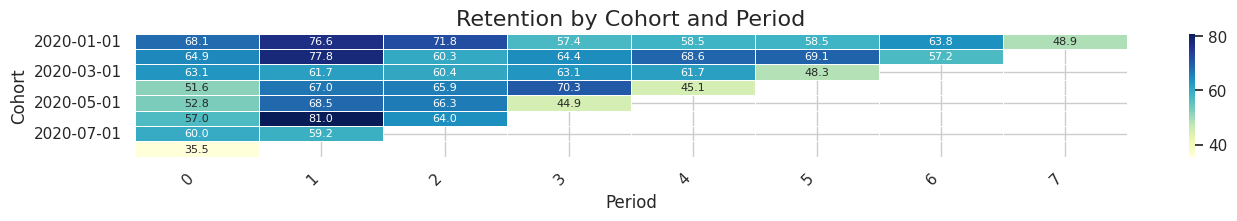

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

query = """
SELECT *
FROM `analytics-take-home-test.monzo_datawarehouse_shubh_cohorts.cohort_retention_monthly`
"""

# Execute the query and convert the results to a pandas DataFrame
query_job = client.query(query)
cohort_retention_monthly = query_job.to_dataframe()

# Create a pivot table for retention matrix
retention_matrix = cohort_retention_monthly.pivot(index='cohort', columns='period', values='retention_percentage')

# Calculate the size of the figure based on the number of unique signup dates and cohort months
fig_width = len(retention_matrix.columns) * 2  # width per column
fig_height = len(retention_matrix.index) * 0.2  # height per row

plt.figure(figsize=(fig_width, fig_height))  # Increase the figure size
sns.heatmap(retention_matrix, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, annot_kws={"size": 8})
plt.title('Retention by Cohort and Period', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Cohort', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()

### Chart 3: Number of Signed-Up Users per Cohort

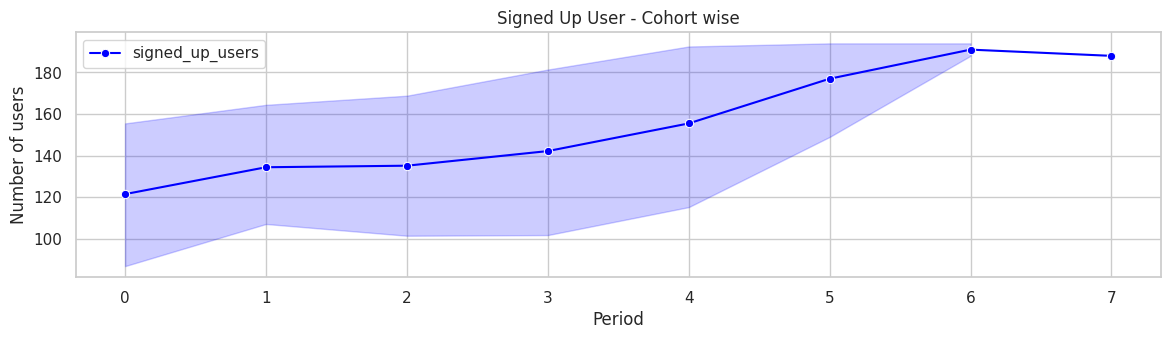

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

query = """
SELECT *
FROM `analytics-take-home-test.monzo_datawarehouse_shubh_cohorts.cohort_retention_monthly`
"""

# Execute the query and convert the results to a pandas DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Number of users per cohort
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
sns.lineplot(x='period', y='signed_up_users', data=df, marker='o', color='blue', label='signed_up_users')
plt.title('Signed Up User - Cohort wise')
plt.xlabel('Period')
plt.ylabel('Number of users')
plt.legend()

### Chart 4: Number of Active Users (Retained Users) per Cohort (log scale)

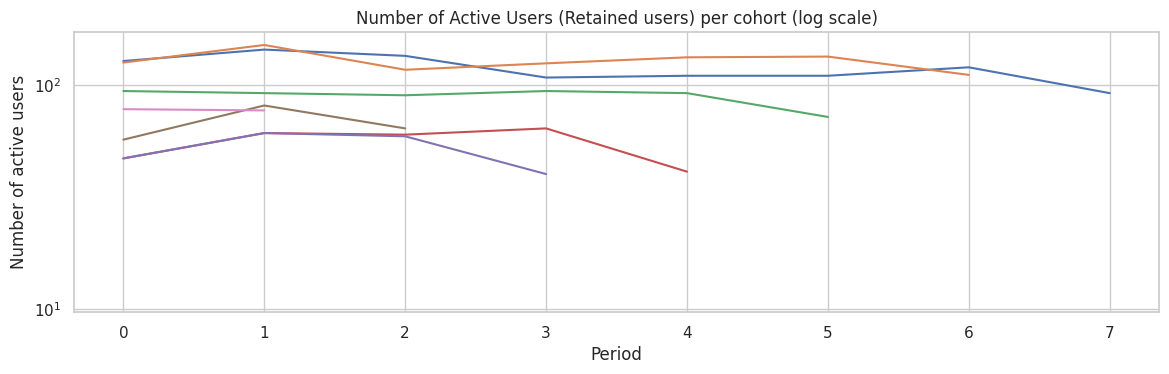

In [80]:
query = """
SELECT *
FROM `analytics-take-home-test.monzo_datawarehouse_shubh_cohorts.cohort_retention_monthly`
"""

# Execute the query and convert the results to a pandas DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Number of active users per cohort (log scale)
plt.subplot(2, 1, 2)
for cohort in df['cohort'].unique():
    cohort_data = df[df['cohort'] == cohort]
    plt.plot(cohort_data['period'], cohort_data['retained_users'], label=cohort)
plt.yscale('log')
plt.title('Number of Active Users (Retained users) per cohort (log scale)')
plt.xlabel('Period')
plt.ylabel('Number of active users')
plt.show()

### Chart 5: Retention % by Cohort and Period (Line Plot)

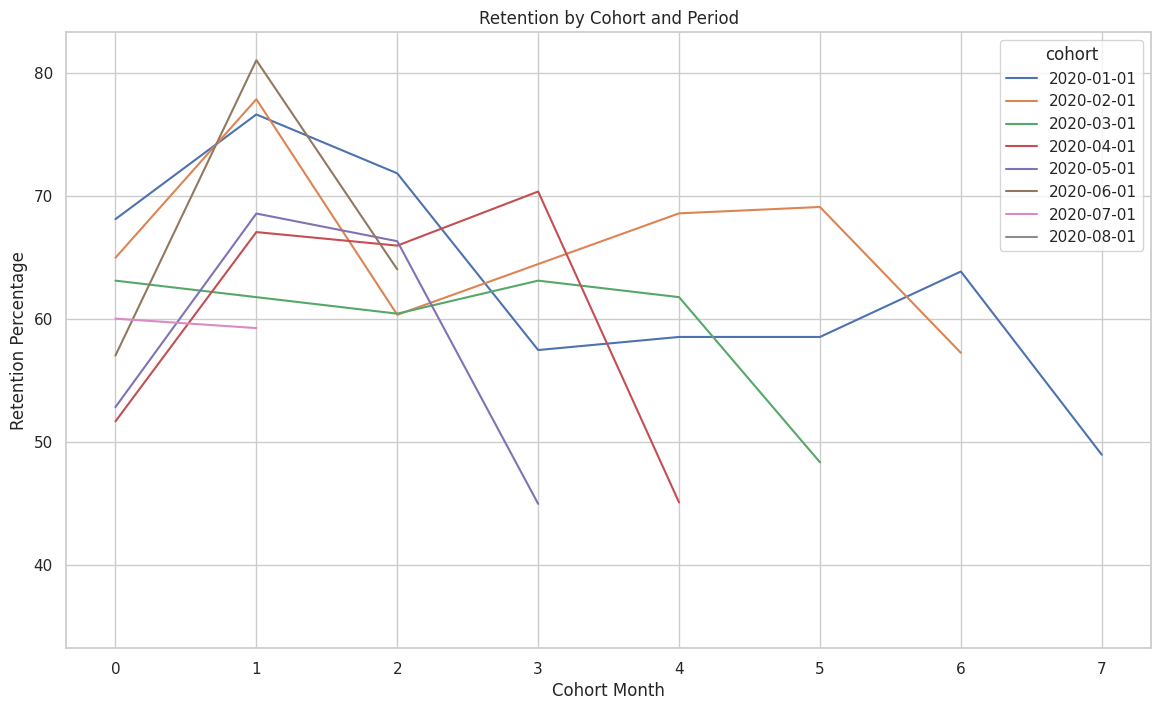

In [81]:
query = """
SELECT *
FROM `analytics-take-home-test.monzo_datawarehouse_shubh_cohorts.cohort_retention_monthly`
"""

# Execute the query and convert the results to a pandas DataFrame
query_job = client.query(query)
cohort_retention_monthly = query_job.to_dataframe()

plt.figure(figsize=(14, 8))
sns.lineplot(data=cohort_retention_monthly, x='period', y='retention_percentage', hue='cohort')
plt.title('Retention by Cohort and Period')
plt.xlabel('Cohort Month')
plt.ylabel('Retention Percentage')
plt.show()

### Chart 6: Cohort Retention with 94% Highest Density Interval (HDI)

This chart visualizes the retention rates of different user cohorts over time, along with a 94% Highest Density Interval (HDI) to illustrate the uncertainty or variability in the retention estimates. Each plot represents data for a single cohort (a group of users who signed up during the same period), showing how their retention percentage changes as time progresses from their signup date.



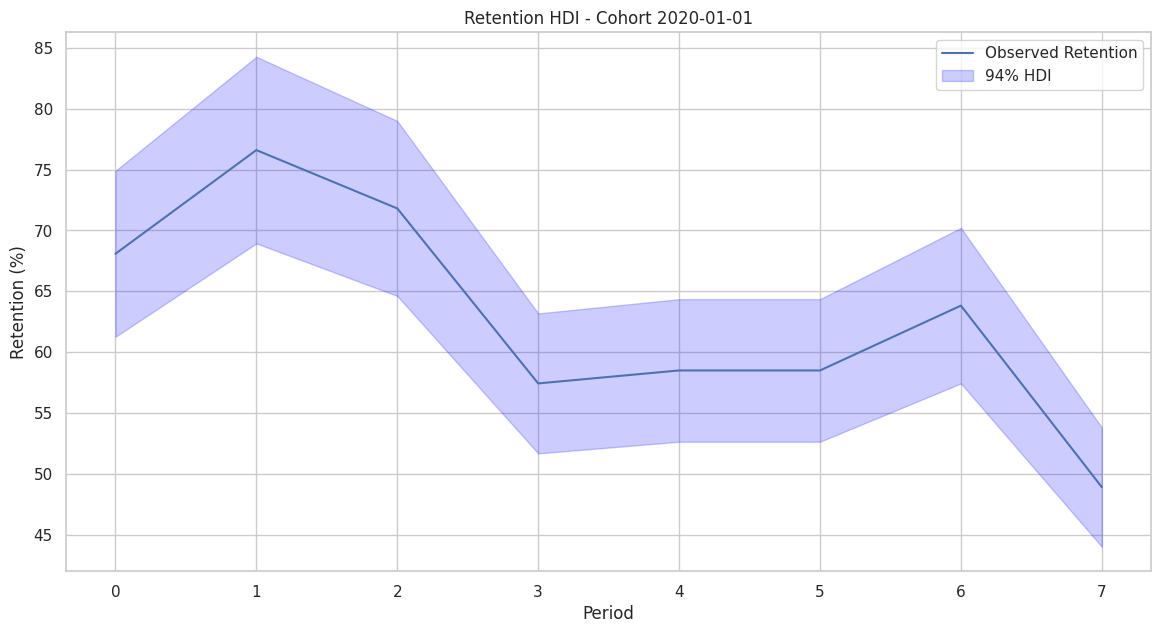

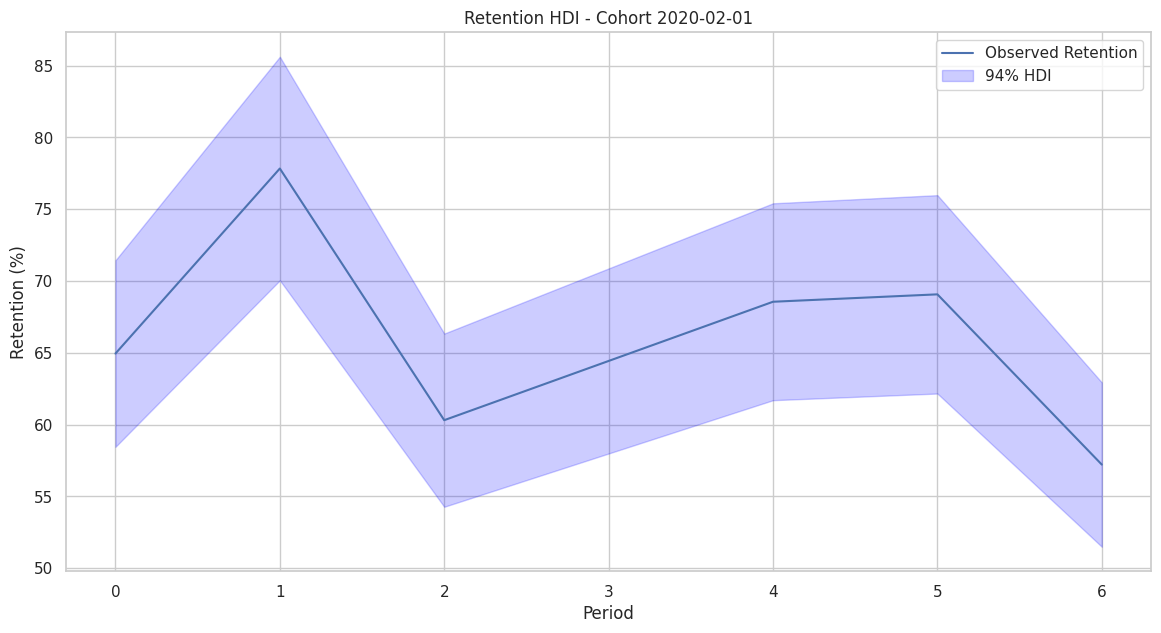

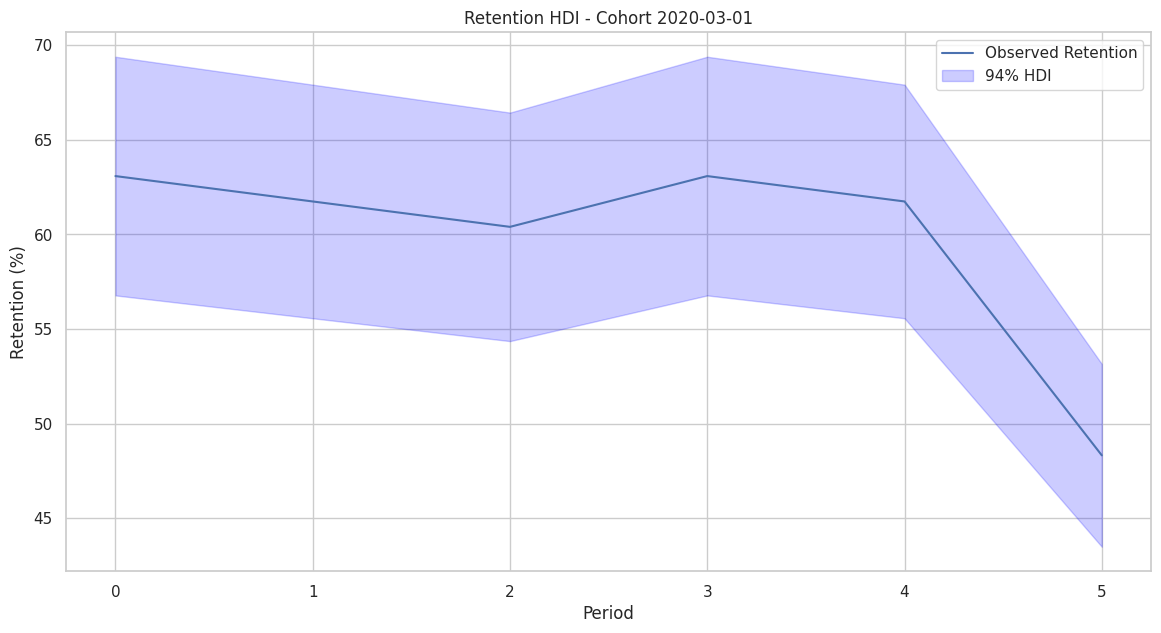

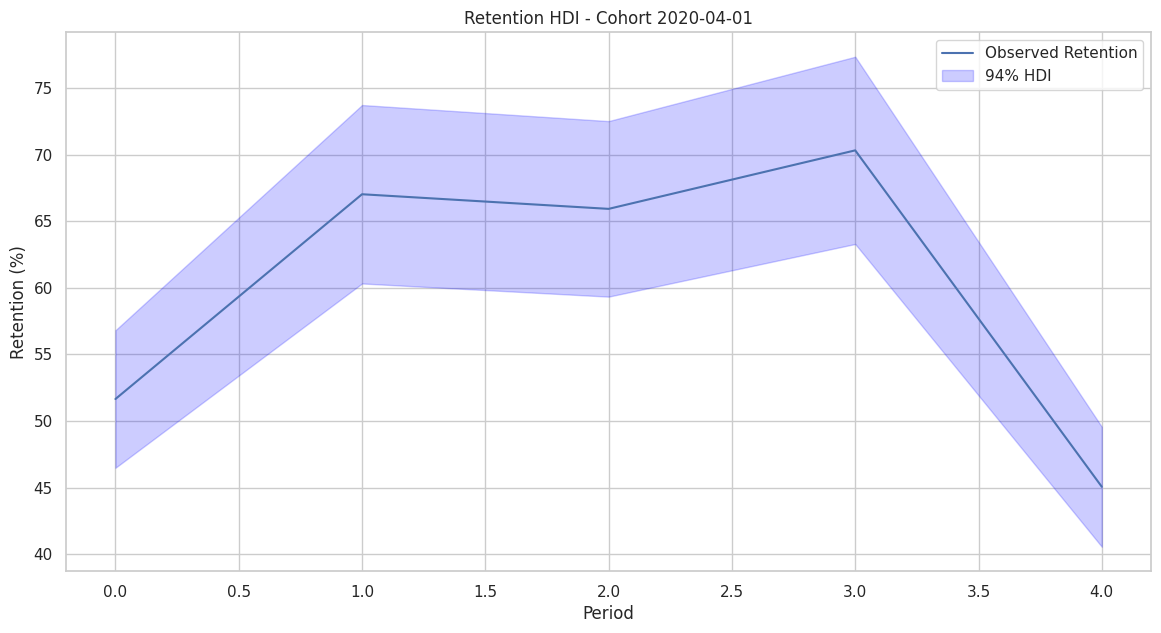

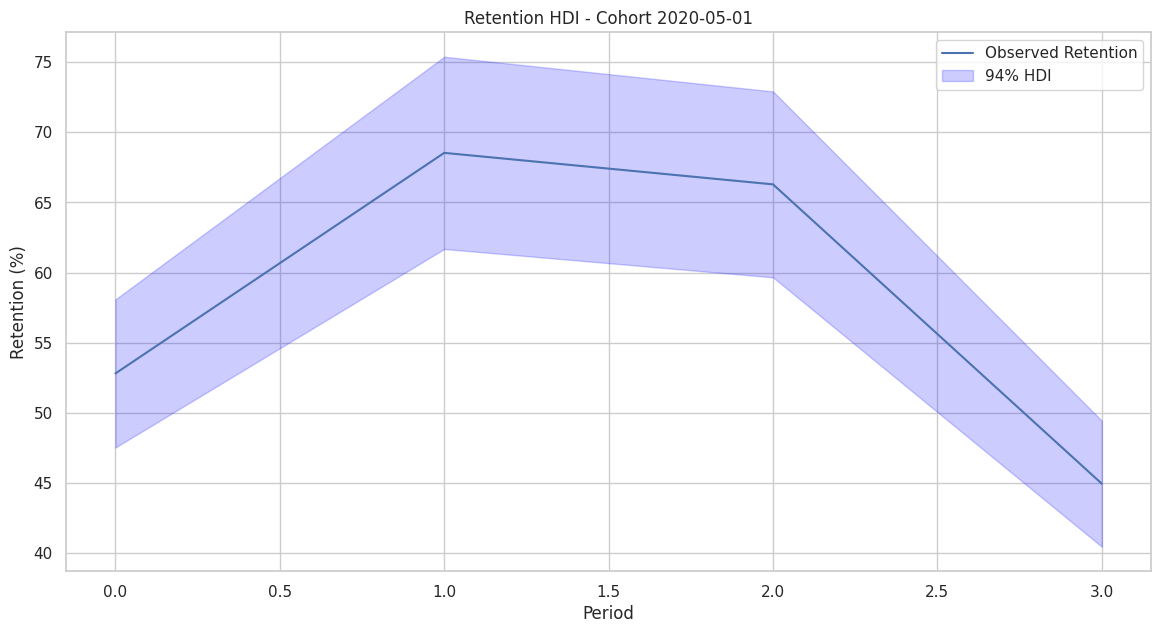

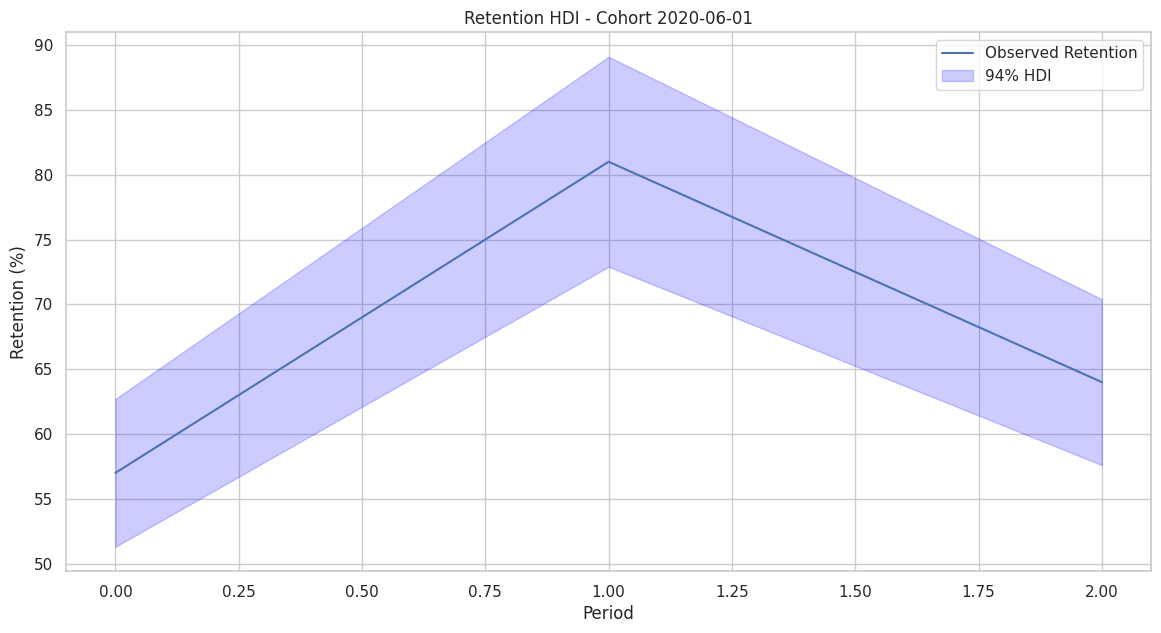

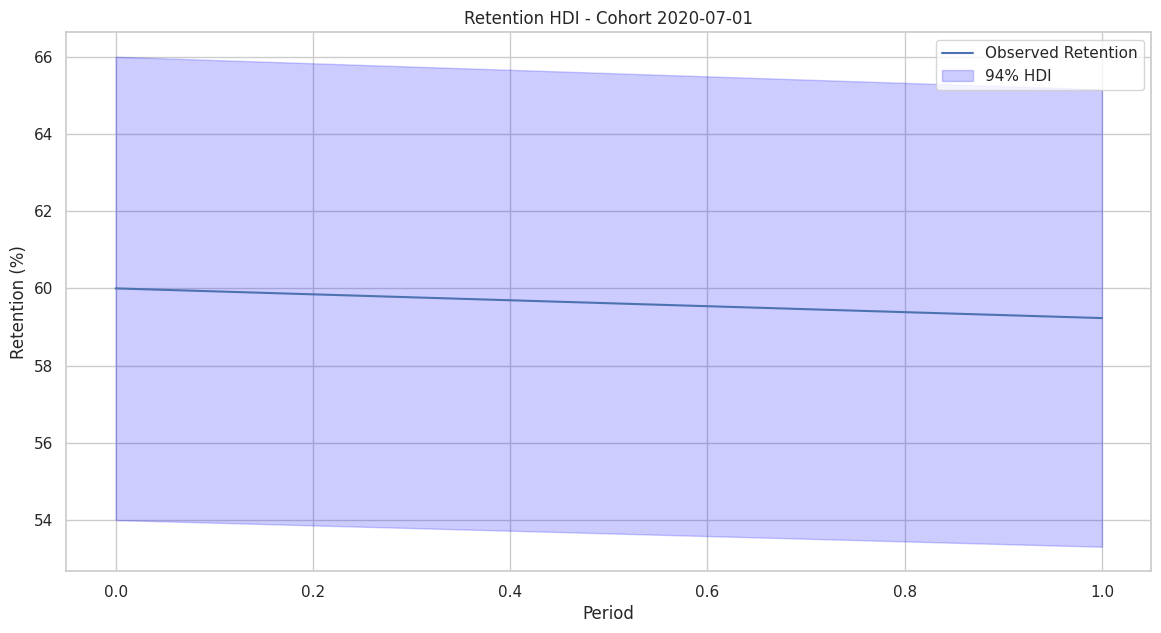

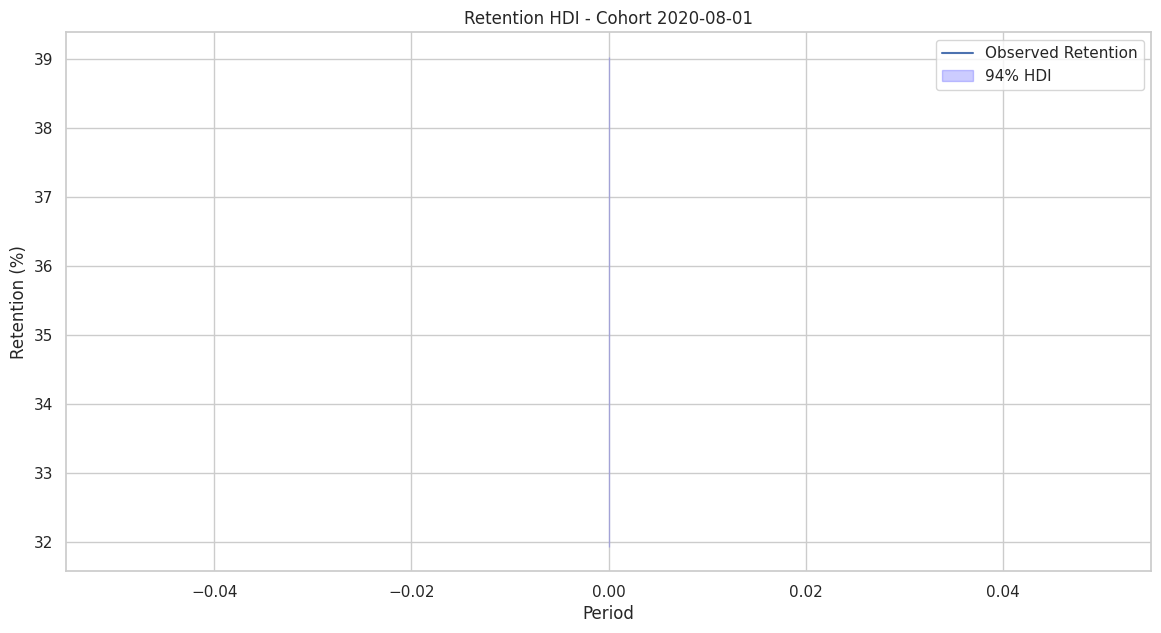

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

query = """
    SELECT *
    FROM
        `analytics-take-home-test.monzo_datawarehouse_shubh_cohorts.cohort_retention_monthly`
"""
df = client.query(query).to_dataframe()

# Ensure period and retention_percentage are numeric
df['period'] = pd.to_numeric(df['period'], errors='coerce')
df['retention_percentage'] = pd.to_numeric(df['retention_percentage'], errors='coerce')

# Drop rows with non-numeric values
df.dropna(subset=['period', 'retention_percentage'], inplace=True)

# Convert to numeric type again to ensure all values are valid
df['period'] = df['period'].astype(float)
df['retention_percentage'] = df['retention_percentage'].astype(float)

# Loop through each cohort and plot the retention HDI
for cohort in df['cohort'].unique():
    cohort_data = df[df['cohort'] == cohort]

    plt.figure(figsize=(14, 7))

    # Plot observed retention
    sns.lineplot(x='period', y='retention_percentage', data=cohort_data, label='Observed Retention')

    # Plot prediction interval (assuming 10% margin as HDI for illustration)
    plt.fill_between(cohort_data['period'],
                     cohort_data['retention_percentage'] * 0.9,
                     cohort_data['retention_percentage'] * 1.1,
                     color='blue', alpha=0.2, label='94% HDI')

    # Plot configuration
    plt.title(f'Retention HDI - Cohort {cohort}')
    plt.xlabel('Period')
    plt.ylabel('Retention (%)')
    plt.legend()
    plt.show()